# Python Solutions to Tutorial 09

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stat 
import matplotlib.pyplot as plt


#url = 'https://raw.githubusercontent.com/APS1040/Tutorials/main/Tutorial09_data.csv'
#df = pd.read_csv(url)

df = pd.read_csv('Tutorial09_data.csv')
df.head()

,Observation,Weight
0,1,1075
1,2,1135
2,3,1087
3,4,1094
4,5,1095


## 1.	Twenty individual observations on molecular weight taken hourly from a chemical process are presented in the dataset. Set up MR and I charts. Is the process in control?

In [2]:
Rs = []
Rs.append(0) # set first entry to 0 so the indices do not mix later
for n in range(1,20):
    R = np.abs(df['Weight'][n]-df['Weight'][n-1])
    Rs.append(R)

CL_R = np.sum(Rs)/19
UCL_R = 3.267 * CL_R 
LCL_R = 0
print(CL_R, UCL_R, LCL_R)

for n in range(1,20):
    if(Rs[n-1] > UCL_R):
         print(n, 'is out of control')


20.842105263157894 68.09115789473684 0


In [3]:
CL_x_bar = df['Weight'].mean()
UCL_x_bar = CL_x_bar + 2.66 * CL_R # E2
LCL_x_bar = CL_x_bar - 2.66 * CL_R # E2
print(CL_x_bar, UCL_x_bar, LCL_x_bar)

for n in range(1,20):
    if(df['Weight'][n-1] > UCL_x_bar or df['Weight'][n-1]<LCL_x_bar ):
         print(n, 'is out of control')


1126.75 1182.19 1071.31


The process is in control based on the I-MR chart

## 2.	Based on the data and the control charts, what is the estimate of the process mean?

In [4]:
mu = CL_x_bar
print("The estimate of the process mean is: ", mu) 

The estimate of the process mean is:  1126.75


## 3.	Based on the data and the control charts, what is the estimate of the process standard deviation?

In [5]:
sigma = CL_R/1.128
print("The estimate of the process standard deviation is: ", sigma)

The estimate of the process standard deviation is:  18.477043673012318


## 4.	We wish to detect all the shifts of 1.0 σ that may happen in this process with an EWMA control chart. What are the appropriate values of λ and L that will result in the lowest ARL? 

Using the EWMA table: Lambda = 0.10 and L = 2.814

## 5.	Set up an EWMA control chart for the shifts of 1.0 σ using the values of λ and L selected in the previous question.  Assume that μ_0 and σ_o are the values of mean and standard deviation found in the I-MR chart. Is the process in control now?

In [6]:
lam = 0.1
L = 2.814

z = []

for n in range(0,20):
    if n==0:
        z.append(lam * df['Weight'][n] + (1-lam) * mu )
    else:
        z.append(lam * df['Weight'][n] + (1-lam) * z[n-1])


CL = mu
df['UCL'] = mu + L * sigma * np.sqrt((lam/(2-lam)) * (1-(1-lam)**(2*df['Observation'] )))
df['LCL'] = mu - L * sigma * np.sqrt((lam/(2-lam)) * (1-(1-lam)**(2*df['Observation'] )))

for n in range(0,20):
    if(z[n] > df['UCL'][n] or z[n]<df['LCL'][n]):
        print(n+1, 'is out of control')



4 is out of control
5 is out of control
6 is out of control
7 is out of control
8 is out of control
9 is out of control
10 is out of control


it is out of control 

PLOT:

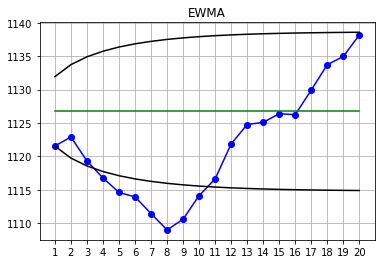

In [7]:
m=20
plt.plot(z,marker="o",color='b')
plt.plot(df['UCL'],color='k')
plt.plot(df['LCL'],color='k')
cl_line = np.full(m,CL) # create an array with all elements equal to the UCL
plt.plot(cl_line,color='g')

# These three lines help to set the labels of the x-axis to go from 1 to m
labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 

plt.grid(True)
plt.title('EWMA')
plt.show()

## 6. 	When was the shift of 1.0 σ firstly detected in the EWMA chart?

From the above chart, 4th observation 

## 7.	Now we wish to detect a shift of 2.5 σ in the process using the EWMA chart.  What are the values of λ and L that will result in the lowest ARL?

## 8.	Set up an EWMA control chart for the shifts of 2.5 σ using the values of λ and L selected in the previous question. Assume that μ_0 and σ_o are the values of mean and standard deviation found in the I-MR chart. Is the process in control now?

In [8]:
lam = 0.4
L = 3.054

z = []

for n in range(0,20):
    if n==0:
        z.append(lam * df['Weight'][n] + (1-lam) * mu )
    else:
        z.append(lam * df['Weight'][n] + (1-lam) * z[n-1])


CL = mu
df['UCL'] = mu + L * sigma * np.sqrt((lam/(2-lam)) * (1-(1-lam)**(2*df['Observation'] )))
df['LCL'] = mu - L * sigma * np.sqrt((lam/(2-lam)) * (1-(1-lam)**(2*df['Observation'] )))

for n in range(0,20):
    if(z[n] > df['UCL'][n] or z[n]<df['LCL'][n]):
        print(n+1, 'is out of control')



5 is out of control
7 is out of control
8 is out of control
20 is out of control


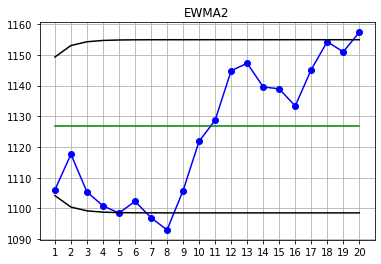

In [9]:
m=20
plt.plot(z,marker="o",color='b')
plt.plot(df['UCL'],color='k')
plt.plot(df['LCL'],color='k')
cl_line = np.full(m,CL) # create an array with all elements equal to the UCL
plt.plot(cl_line,color='g')

# These three lines help to set the labels of the x-axis to go from 1 to m
labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 

plt.grid(True)
plt.title('EWMA2')
plt.show()

## 9.	When was the shift of 2.5 σ firstly detected in the EWMA chart?

5th observation

## 10. 	Now suppose we wish to implement a Fast Initial Response (FIR) to the EWMA control chart for the shift of 1.0 σ. When is this shift firstly detected in the EWMA chart? Assume f = 0.5.

In [10]:
lam = 0.1
L = 2.814
f = 0.5
a = (-2/np.log10(1-f)-1)/19

z = []

for n in range(0,20):
    if n==0:
        z.append(lam * df['Weight'][n] + (1-lam) * mu )
    else:
        z.append(lam * df['Weight'][n] + (1-lam) * z[n-1])


CL = mu
df['UCL'] = mu + (L * sigma * np.sqrt((lam/(2-lam)) * (1-(1-lam)**(2*df['Observation'] )))) * (1-(1-f)**(1 + a*(df['Observation']-1) ) )
df['LCL'] = mu - (L * sigma * np.sqrt((lam/(2-lam)) * (1-(1-lam)**(2*df['Observation'] )))) * (1-(1-f)**(1 + a*(df['Observation']-1) ) )

for n in range(0,20):
    if(z[n] > df['UCL'][n] or z[n]<df['LCL'][n]):
        print(n+1, 'is out of control')



1 is out of control
3 is out of control
4 is out of control
5 is out of control
6 is out of control
7 is out of control
8 is out of control
9 is out of control
10 is out of control


first observation is out of control